In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


df = pd.read_csv('F1Drivers_Dataset.csv')
len(df)

FileNotFoundError: [Errno 2] No such file or directory: 'F1Drivers_Dataset.csv'

In [ ]:

df = df[df["Podiums"] != 0]
df.head()
len(df)

215

In [ ]:
df.columns
not_needed = ['Nationality', 'Seasons', 'Active','Race_Entries', 'Championship Years', 'Decade', 'Champion']

In [ ]:
len(df)

215

In [ ]:
df = df.drop(not_needed, axis=1)

In [ ]:
df.head()

,Driver,Championships,Race_Starts,Pole_Positions,Race_Wins,Podiums,Fastest_Laps,Points,Pole_Rate,Start_Rate,Win_Rate,Podium_Rate,FastLap_Rate,Points_Per_Entry,Years_Active
11,Alexander Albon,0.0,60.0,0.0,0.0,2.0,0.0,202.0,0.000000,0.983607,0.000000,0.032787,0.000000,3.311475,3
12,Michele Alboreto,0.0,194.0,2.0,5.0,23.0,5.0,186.5,0.009302,0.902326,0.023256,0.106977,0.023256,0.867442,14
13,Jean Alesi,0.0,201.0,2.0,1.0,32.0,4.0,241.0,0.009901,0.995050,0.004950,0.158416,0.019802,1.193069,13
16,Cliff Allison,0.0,16.0,0.0,0.0,1.0,0.0,11.0,0.000000,0.888889,0.000000,0.055556,0.000000,0.611111,4
17,Fernando Alonso,2.0,356.0,22.0,32.0,99.0,23.0,2076.0,0.061281,0.991643,0.089136,0.275766,0.064067,5.782730,19


In [ ]:

# sns.pairplot(df, kind='qq')


In [ ]:

# sns.pairplot(df, kind="scatter")

In [ ]:
correlation = df.drop("Driver", axis=1 ).corr()

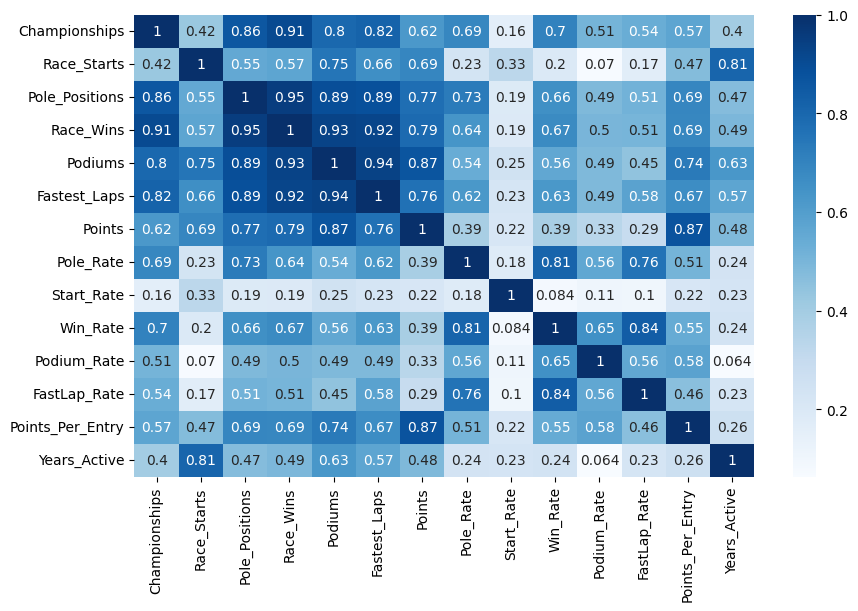

In [ ]:

plt.figure(figsize=(10, 6))  
sns.heatmap(correlation, annot=True)

plt.show()

In [ ]:
X = df.drop(['Race_Wins','Driver'], axis=1)
y = df['Race_Wins']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()

model.fit(X_train, y_train)


y_pred = model.predict(X_test)


print("Model coefficients:", model.coef_)
print("Model intercept:", model.intercept_)

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Model coefficients: [ 2.63933403e+00 -1.25681025e-02  2.95388442e-01  1.57656904e-01
  3.40705334e-01  1.48075366e-03 -2.00597531e+01  2.38223836e+00
  2.87917810e+01 -2.39961684e+00 -1.32542770e+01 -3.72164219e-01
 -9.47727184e-02]
Model intercept: -1.0382192727574422
Mean Squared Error: 6.854029290019512
R-squared: 0.9740448928722918


In [ ]:
#import statsmodels.api as sm


#X = sm.add_constant(X)  # Add constant term for intercept

# Fit the model
#model = sm.OLS(y, X).fit()

# Print the summary
#print(model.summary())

In [ ]:
df.describe()

,Championships,Race_Starts,Pole_Positions,Race_Wins,Podiums,Fastest_Laps,Points,Pole_Rate,Start_Rate,Win_Rate,Podium_Rate,FastLap_Rate,Points_Per_Entry,Years_Active
count,215.000000,215.00000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,0.339535,83.84186,4.986047,5.037209,15.167442,5.032558,218.029442,0.040684,0.944182,0.044611,0.167095,0.046728,1.708432,8.018605
std,1.014415,78.48646,12.020807,12.311324,25.885439,9.983344,500.008644,0.081400,0.085184,0.078677,0.157519,0.077390,1.938248,4.022092
min,0.000000,1.00000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.500000,0.000000,0.006993,0.000000,0.090909,1.000000
25%,0.000000,16.00000,0.000000,0.000000,1.000000,0.000000,11.500000,0.000000,0.926378,0.000000,0.047619,0.000000,0.556564,5.000000
50%,0.000000,62.00000,0.000000,1.000000,3.000000,1.000000,51.000000,0.000000,0.978261,0.008929,0.125000,0.013986,1.190476,7.000000
75%,0.000000,119.50000,4.000000,4.500000,19.000000,5.000000,200.500000,0.041675,0.994762,0.055395,0.248656,0.067900,2.000000,11.000000
max,7.000000,356.00000,103.000000,103.000000,191.000000,77.000000,4415.500000,0.557692,1.000000,0.461538,1.000000,0.500000,14.197749,19.000000


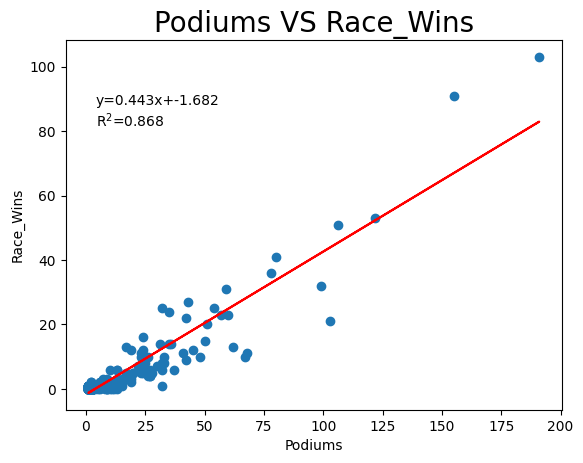

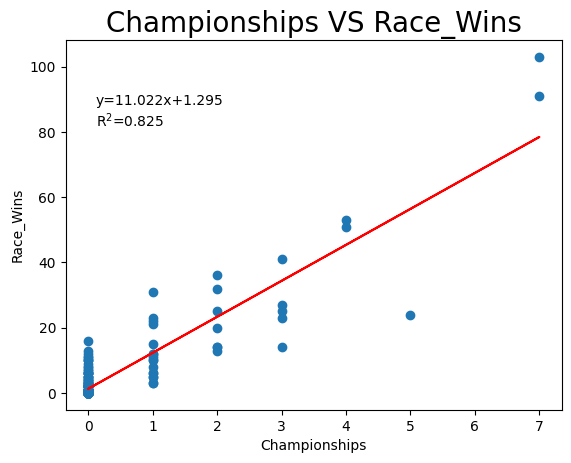

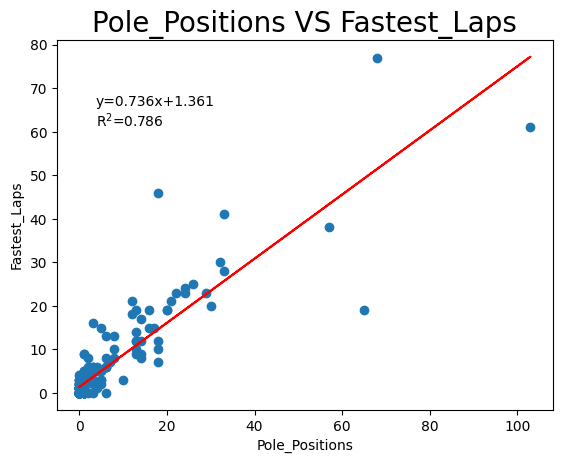

In [ ]:
from scipy import stats

plt.scatter(df['Podiums'],df['Race_Wins'])
plt.xlabel('Podiums') 
plt.ylabel('Race_Wins') 
plt.title('Podiums VS Race_Wins', fontsize = 20) 
s,i,r,p,st=stats.linregress(df['Podiums'],df['Race_Wins'])
plt.plot(df['Podiums'],s*df['Podiums']+i,color='red')
plt.annotate("y=%.3fx+%.3f\nR$^2$=%.3f"%(s,i,r**2),xy=(0.15,0.7),xycoords='figure fraction')
plt.show()

plt.scatter(df['Championships'],df['Race_Wins'])
plt.xlabel('Championships') 
plt.ylabel('Race_Wins') 
plt.title('Championships VS Race_Wins', fontsize = 20) 
s,i,r,p,st=stats.linregress(df['Championships'],df['Race_Wins'])
plt.plot(df['Championships'],s*df['Championships']+i,color='red')
plt.annotate("y=%.3fx+%.3f\nR$^2$=%.3f"%(s,i,r**2),xy=(0.15,0.7),xycoords='figure fraction')
plt.show()

plt.scatter(df['Pole_Positions'],df['Fastest_Laps'])
plt.xlabel('Pole_Positions') 
plt.ylabel('Fastest_Laps') 
plt.title('Pole_Positions VS Fastest_Laps', fontsize = 20) 
s,i,r,p,st=stats.linregress(df['Pole_Positions'],df['Fastest_Laps'])
plt.plot(df['Pole_Positions'],s*df['Pole_Positions']+i,color='red')
plt.annotate("y=%.3fx+%.3f\nR$^2$=%.3f"%(s,i,r**2),xy=(0.15,0.7),xycoords='figure fraction')
plt.show()



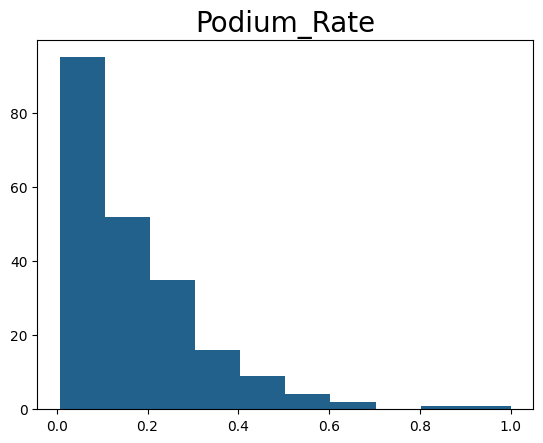

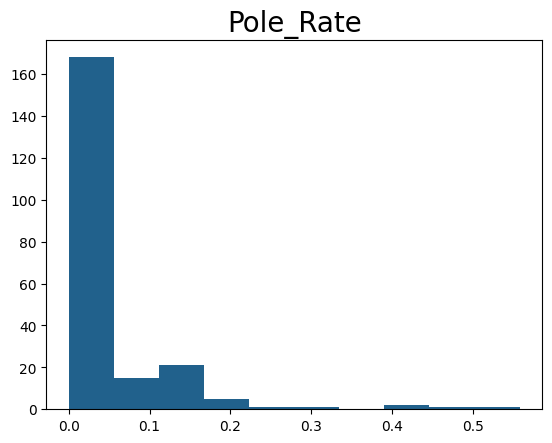

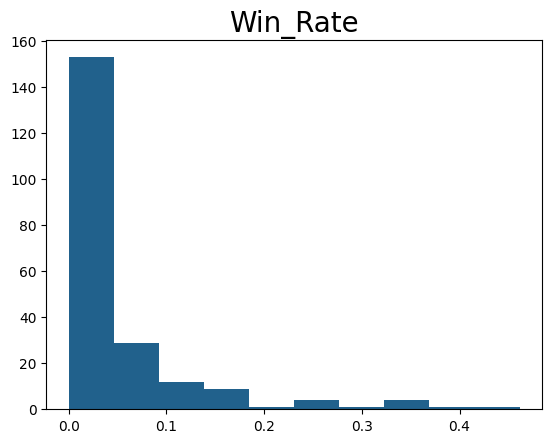

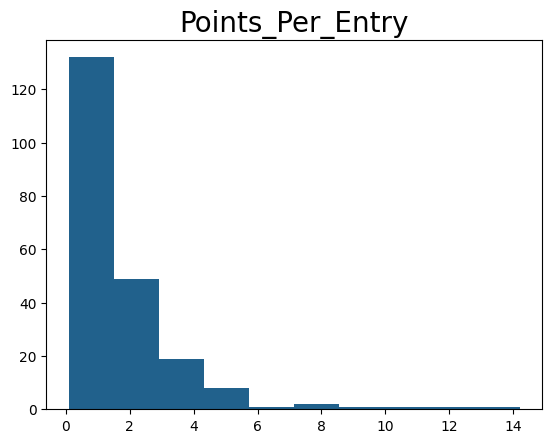

In [ ]:
plt.hist(df['Podium_Rate'],color='#21618C')
plt.title('Podium_Rate', fontsize = 20) 
plt.show() 
plt.hist(df['Pole_Rate'],color='#21618C')
plt.title('Pole_Rate', fontsize = 20)
plt.show()
plt.hist(df['Win_Rate'],color='#21618C')
plt.title('Win_Rate', fontsize = 20) 
plt.show()
plt.hist(df['Points_Per_Entry'],color='#21618C')
plt.title('Points_Per_Entry', fontsize = 20) 
plt.show()

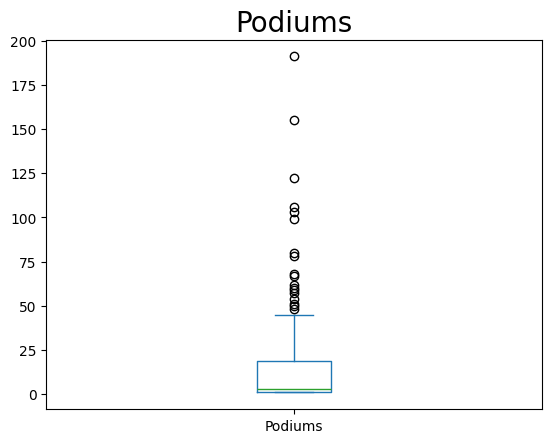

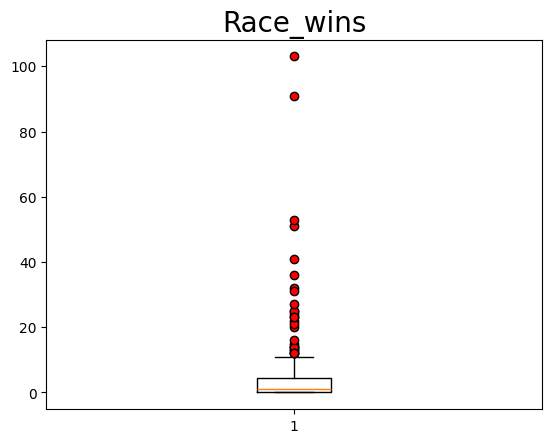

In [ ]:
red=dict(markerfacecolor='red',marker='o')
df['Podiums'].plot(kind='box')
plt.title('Podiums', fontsize = 20) 
plt.show()
plt.boxplot(df['Race_Wins'],flierprops=red)
plt.title('Race_wins', fontsize = 20) 
plt.show()

<Axes: >

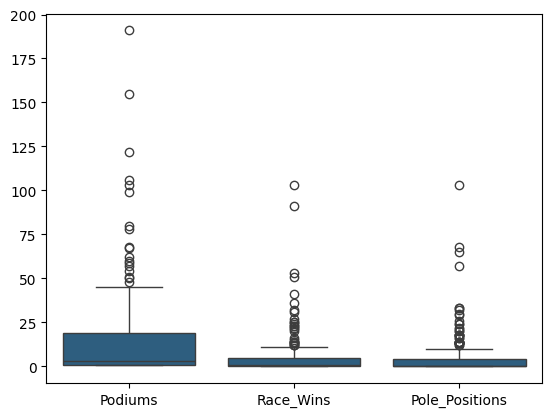

In [ ]:
tf = df[['Podiums','Race_Wins','Pole_Positions']]

sns.boxplot(tf,color='#21618C')

<Axes: >

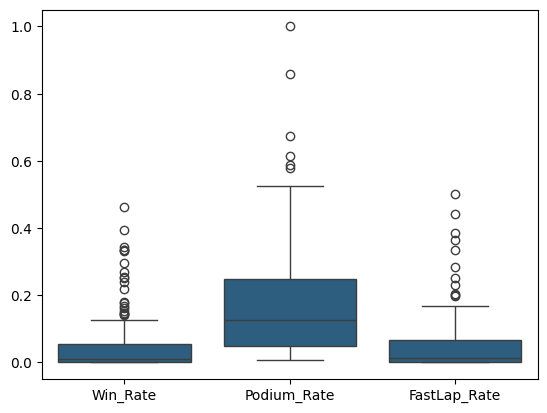

In [ ]:
yf = df[['Win_Rate','Podium_Rate','FastLap_Rate']]

sns.boxplot(yf,color='#21618C')